# Over and Under Sampling Methods

# Under Sampling Methods

In [1]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0) # summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


### The example below provides a complete example of evaluating a decision tree on an imbal- anced dataset with a 1:100 class distribution. 

In [3]:

# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())] 
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1) 
score = mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.988


# Under Sampling Methods

In [4]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0) # summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


In [6]:
# example of evaluating a decision tree with random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())] 
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1) 
score = mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.862


# Smote for Balancing Data

Counter({0: 9900, 1: 100})


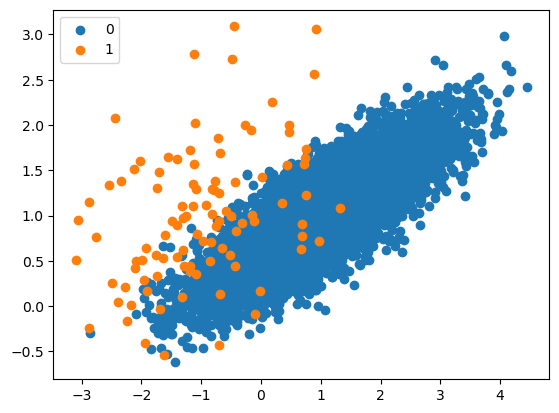

In [7]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
  n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


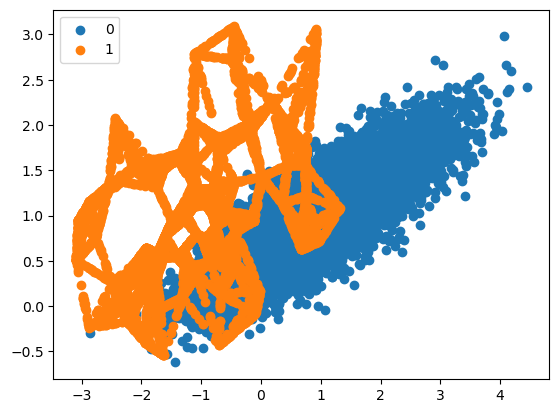

In [8]:

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Model created without SMOTE

In [10]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) 
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.761


## Model created with SMOTE

In [11]:
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) 
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.823


## Automated approach testing params with SMOTE

In [12]:

# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
  # define pipeline
  model = DecisionTreeClassifier()
  over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
  pipeline = Pipeline(steps=[('over', over), ('model', model)])
  # evaluate pipeline
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) 
  score = mean(scores)
  print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.784
> k=2, Mean ROC AUC: 0.789
> k=3, Mean ROC AUC: 0.805
> k=4, Mean ROC AUC: 0.809
> k=5, Mean ROC AUC: 0.817
> k=6, Mean ROC AUC: 0.817
> k=7, Mean ROC AUC: 0.820


## Borderline Smote for data points that lie on the decision boundary

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


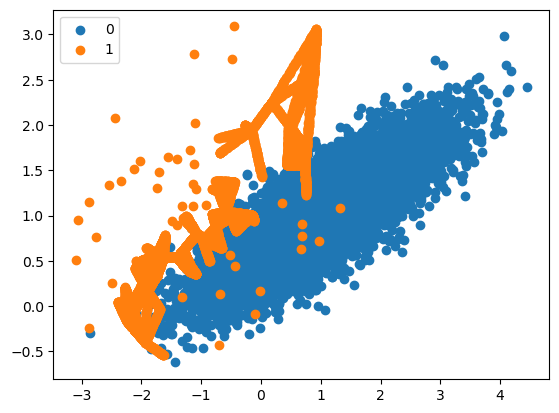

In [13]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot

from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## SVM SMOTE

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


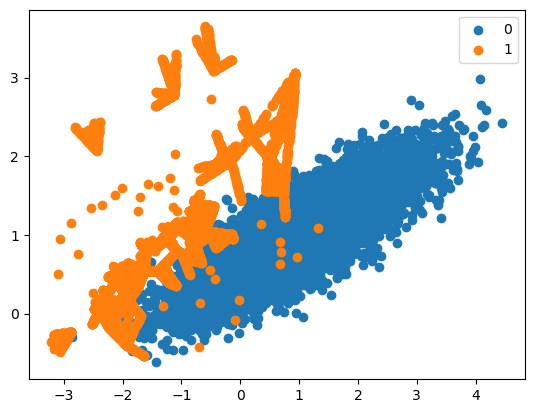

In [14]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## ADASYN SAMPLING

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


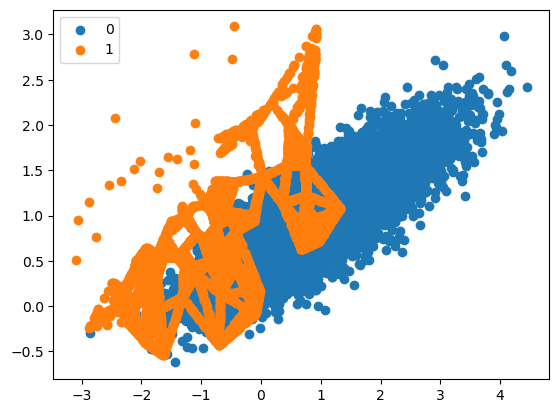

In [1]:

# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Near Miss One: Majority class examples with minimum average distance to three closest minority class examples.

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


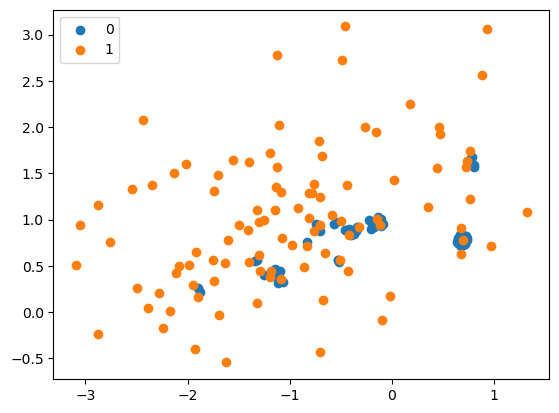

In [2]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Near Miss Two: It selects examples that are closest to the most distant examples from the minority class, defined by the n neighbors argument.

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


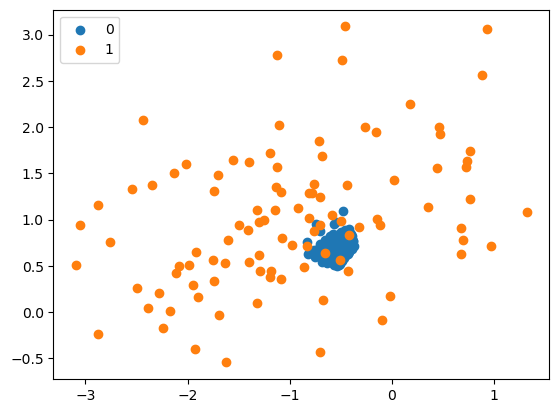

In [3]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Near Miss 3: selects the closest examples from the majority class for each minority class.

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


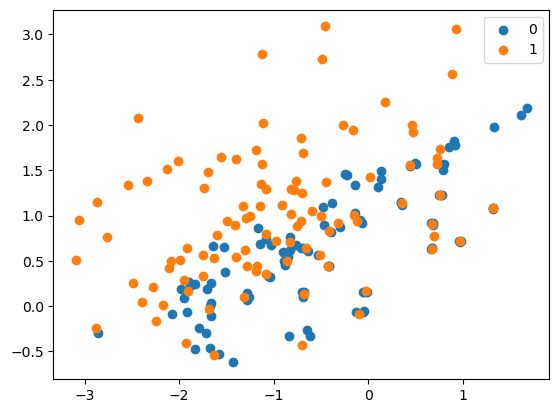

In [4]:

# Undersample imbalanced dataset with NearMiss-3
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)

print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


## Condensed Nearest Neighbor Rule Undersampling

Counter({0: 9900, 1: 100})
Counter({0: 188, 1: 100})


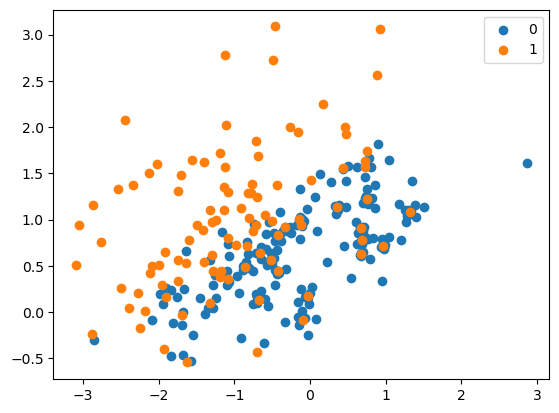

In [5]:

# undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import CondensedNearestNeighbour
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Tomek Links: The procedure for finding Tomek Links can be used to locate all cross-class nearest neighbors.

Counter({0: 9900, 1: 100})
Counter({0: 9874, 1: 100})


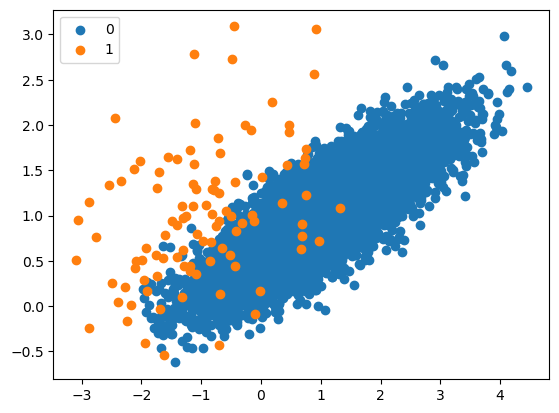

In [6]:
# undersample and plot imbalanced dataset with Tomek Links
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Edited Nearest Neighbors

Counter({0: 9900, 1: 100})
Counter({0: 9806, 1: 100})


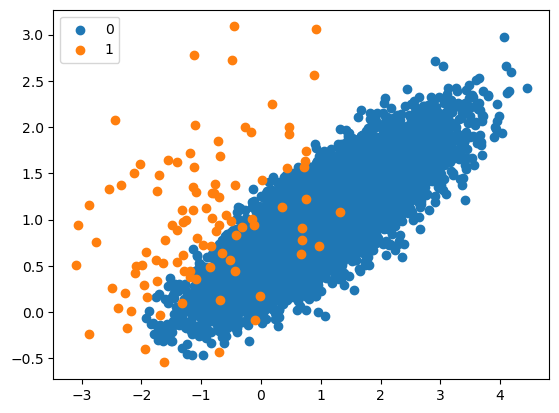

In [7]:
# undersample and plot imbalanced dataset with the Edited Nearest Neighbor rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import EditedNearestNeighbours
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = EditedNearestNeighbours(n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()

## OSS Sampling Strategy

#### One-Sided Selection, or OSS for short, is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. Specifically, Tomek Links are ambiguous points on the class boundary and are identified and removed in the majority class. The CNN method is then used to remove redundant examples from the majority class that are far from the decision boundary.

Counter({0: 9900, 1: 100})
Counter({0: 972, 1: 100})


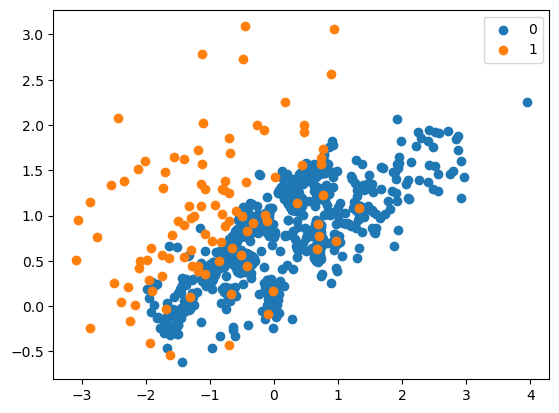

In [8]:
# undersample and plot imbalanced dataset with One-Sided Selection
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import OneSidedSelection
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Neighborhood Cleaning Rule: 

#### The Neighborhood Cleaning Rule, or NCR for short, is an undersampling technique that combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples and the Edited Nearest Neighbors (ENN) Rule to remove noisy or ambiguous examples.

Counter({0: 9900, 1: 100})
Counter({0: 9786, 1: 100})


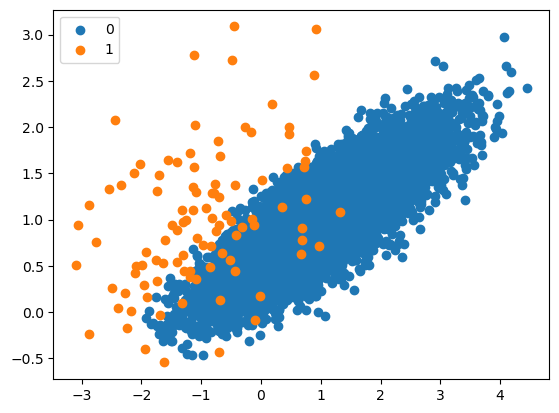

In [9]:
# undersample and plot imbalanced dataset with the neighborhood cleaning rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NeighbourhoodCleaningRule
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


## This point in the notebooks will now be focused on combining under and over sampling techniques 

## Model performance on imbalance data set

In [1]:
# evaluates a decision tree model on the imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# generate 2 class dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) # summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.769


## Model performance on combining over and under sampling methods

In [2]:
# combination of random oversampling and undersampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define sampling
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# define pipeline
pipeline = Pipeline(steps=[('o', over), ('u', under), ('m', model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) # summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.817
